# Samples 

* Can be big or small
* Can be biased or representative
* Can be probabilistic or not 
* Can be random or not 
* Can follow some rules or not 

Different types of samples: 
1. Probabilistic samples
    * Simple random sample - doesnt exist
    * Mechanic (systematic) sample - can brinf biases due to absence of willingness or motivation 
    * Stratified sample 
    * Cluster sample 
1. Non-probabilistic samples 
    * Quote sample 
    * Snowball sample 
    * Chaotic sample

In [1]:
pip install kaggle

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import kaggle
kaggle.api.dataset_download_files('rtatman/chocolate-bar-ratings')
import zipfile
name=zipfile.ZipFile('./chocolate-bar-ratings.zip').filelist[0].filename
import pandas as pd
df=pd.read_csv(zipfile.ZipFile('./chocolate-bar-ratings.zip').open(name))

OSError: Could not find kaggle.json. Make sure it's located in /Users/etienneleconte/.kaggle. Or use the environment method.

In [10]:
import pandas as pd 
df=pd.read_csv('/Users/etienneleconte/Downloads/chocolate-bar-ratings.zip')

In [15]:
df.columns=df.columns.str.replace('\n','_').str.replace(' ','_')

In [18]:
mode=df.Cocoa_Percent.mode()[0]

In [21]:
df.loc[df.Cocoa_Percent==mode]

df.query('Cocoa_Percent==Cocoa_Percent.mode()[0]')

,Company _(Maker-if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
...,...,...,...,...,...,...,...,...,...
1771,Zart Pralinen,"Kakao Kamili, Kilombero Valley",1824,2016,70%,Austria,3.50,"Criollo, Trinitario",Tanzania
1781,Zotter,"Satipo Pangoa region, 16hr conche",875,2012,70%,Austria,3.00,Criollo (Amarru),Peru
1782,Zotter,"Satipo Pangoa region, 20hr conche",875,2012,70%,Austria,3.50,Criollo (Amarru),Peru
1787,Zotter,Santo Domingo,879,2012,70%,Austria,3.75,,Dominican Republic


In [22]:
df1=df.loc[df.Cocoa_Percent==mode].copy()

```df1``` is my population 

In [23]:
df1.Rating.describe()

count    672.000000
mean       3.276042
std        0.452957
min        1.000000
25%        3.000000
50%        3.250000
75%        3.500000
max        5.000000
Name: Rating, dtype: float64

## 2.2 Samples 

In [26]:
samples=[df1.sample(150) for i in range(250)]

In [27]:
(lambda x: x.Rating.mean())(samples[1])

3.28

In [30]:
means=list(map(lambda x: x.Rating.mean(), samples))

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

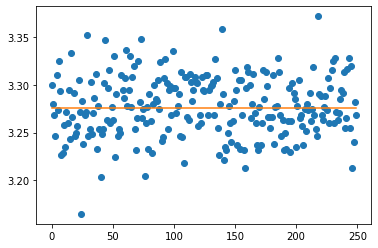

In [34]:
plt.plot(means,'o') # sample averages
plt.plot(range(250), [df1.Rating.mean()]*250) #popultaion mean

(array([ 1.,  2.,  7., 34., 52., 58., 55., 33.,  5.,  3.]),
 array([3.165     , 3.18566667, 3.20633333, 3.227     , 3.24766667,
        3.26833333, 3.289     , 3.30966667, 3.33033333, 3.351     ,
        3.37166667]),
 <BarContainer object of 10 artists>)

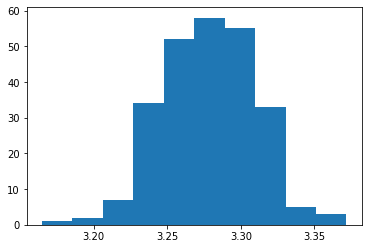

In [35]:
plt.hist(means)

In [36]:
import numpy as np

In [37]:
np.mean(means)

3.2776666666666667

In [38]:
df1.Rating.mean()

3.2760416666666665

{'whiskers': [<matplotlib.lines.Line2D at 0x11d4c61c0>,
 'caps': [<matplotlib.lines.Line2D at 0x11d4c68b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11d4b8e50>],
 'medians': [<matplotlib.lines.Line2D at 0x11d4c6f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x11d4d0310>],
 'means': []}

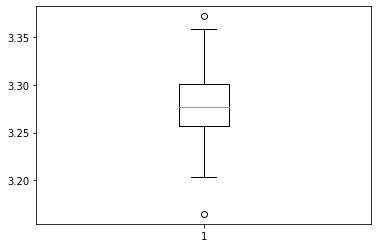

In [40]:
plt.boxplot(means)

## Confidence Intervals

In [41]:
from scipy.stats import norm, t 

In [43]:
norm.interval(0.95, loc=means[0], scale=df1.Rating.std()/df1.shape[0]**0.5)

(3.265753144565457, 3.3342468554345426)

* Build confidence interval for each sample
* Then heck whether population mean is inside the confidence interval of each sample 
* This tells us how many cases out of 250 are not really useful and will indicate the quality of the approach

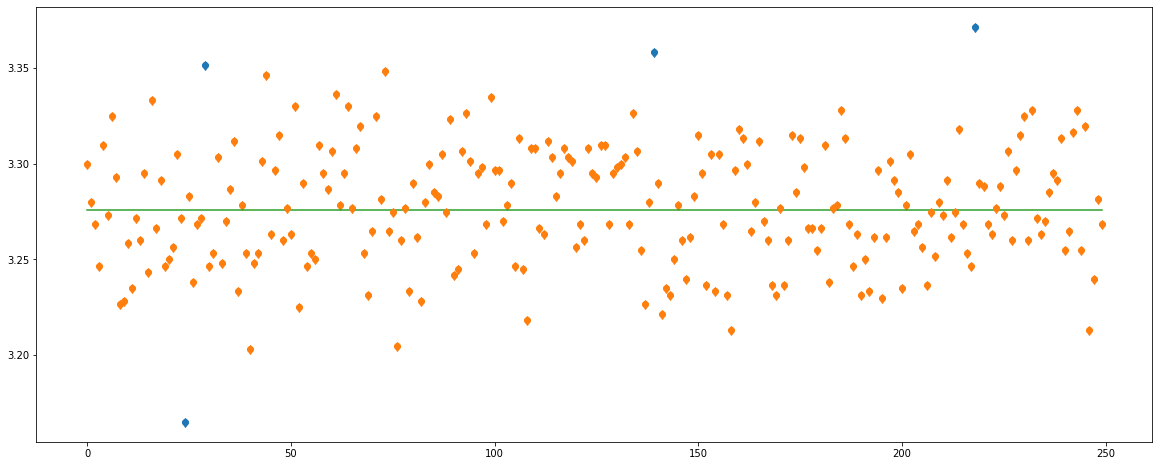

In [45]:
# case when we dont know the population std
def ci_norm(x):
    sample_mean = x.Rating.mean()
    sample_std = x.Rating.std()
    standard_error=sample_std/(x.shape[0])**0.5
    return t.interval(0.95,df=x.shape[0]-1, scale=standard_error)

dd=pd.DataFrame(map(ci_norm, samples), columns=['lower','upper'])
dd['means']=means
dd['population_mean']=df1.Rating.mean()
dd['inside']=dd.eval('lower<(population_mean-means)<upper')
dd.inside.value_counts()

plt.figure(figsize=(20,8))
for inside,x in dd.groupby('inside'):
    plt.errorbar(x.index, x.means, yerr=x.iloc[:,1].T.values, fmt='o', uplims=True, lolims=True)
plt.plot(range(len(samples)), dd.population_mean)
plt.show()

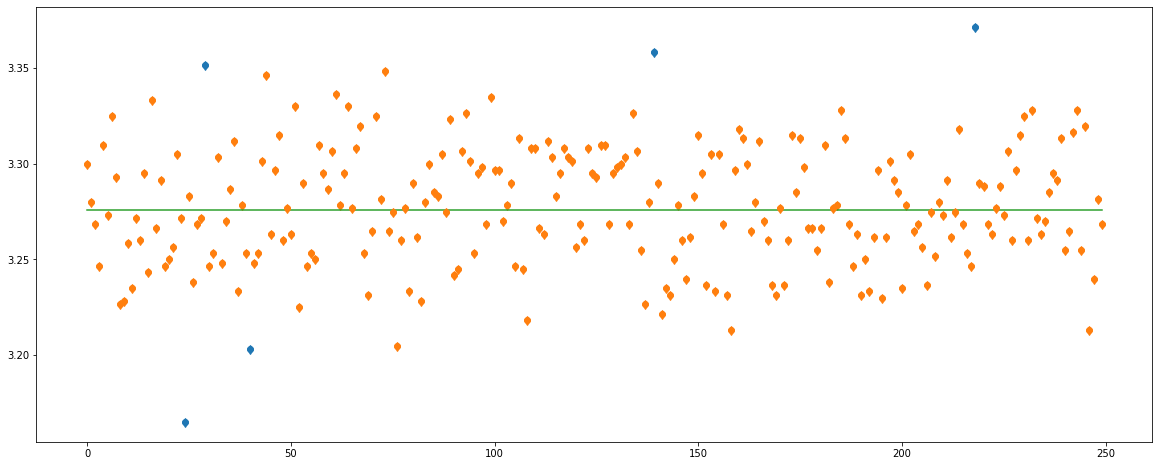

In [46]:
# case when we know the population std
ss=np.var(df1.Rating)
def ci_norm(x, sigma_squared=ss):
    sample_mean = x.Rating.mean()
    standard_error=(sigma_squared/x.shape[0])**0.5
    return norm.interval(0.95, scale=standard_error)

dd=pd.DataFrame(map(ci_norm, samples), columns=['lower','upper'])
dd['means']=means
dd['population_mean']=df1.Rating.mean()
dd['inside']=dd.eval('lower<(population_mean-means)<upper')
dd.inside.value_counts()

plt.figure(figsize=(20,8))
for inside,x in dd.groupby('inside'):
    plt.errorbar(x.index, x.means, yerr=x.iloc[:,1].T.values, fmt='o', uplims=True, lolims=True)
plt.plot(range(len(samples)), dd.population_mean)
plt.show()